In [1]:
import GPy
import pandas as pd
import numpy as np
import komatsu
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 16

In [2]:
hasaki_names, hasaki = komatsu.load_data(komatsu.HASAKI_NAMES, komatsu.HASAKI)
mamouryo_names, mamouryo = komatsu.load_data(komatsu.MAMOURYO_NAMES, komatsu.MAMOURYO)
sessaku_names, sessaku = komatsu.load_data(komatsu.SESSAKU_NAMES, komatsu.SESSAKU)

In [3]:
Y = mamouryo[1]
X = hasaki.transpose(1, 0)

X, Y, _, _ = komatsu.normalize(X, Y)
print(Y.shape, X.shape)
n_features = X.shape[1]
print(n_features)
Y = Y[:, np.newaxis]
print(Y.shape, X.shape)

(50,) (50, 37)
37
(50, 1) (50, 37)


In [4]:
# kernel = GPy.kern.RBF(n_features, variance=10, ARD=True)
kernel = GPy.kern.Matern52(n_features, ARD=True)


In [5]:
model = GPy.models.GPRegression(X, Y, kernel)
model.optimize(messages=True, max_iters=1e5)

A Jupyter Widget

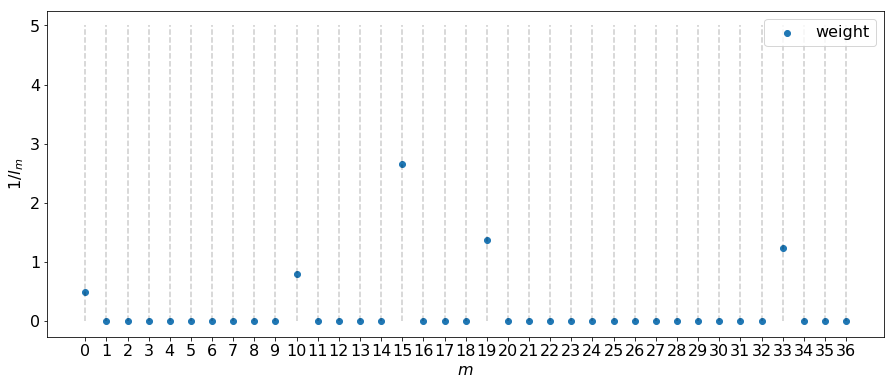

[1.992245230748463, 32615.971044372352, 11850.50650286375, 35273.16162435523, 26381.787883724228, 31821.41387117987, 22805.324551541893, 24666.490282735343, 29728.914929677867, 24543.20161514912, 1.2399795323657046, 27867.823451880664, 22203.86497978422, 10405.454261364082, 5761.0748586631225, 0.3758578533209531, 13755.441831689968, 14547.222833177344, 12806.44350657819, 0.7272935035628878, 13041.342532823042, 11068.207981368885, 30680.085086279938, 26385.098570316684, 15874.213667542925, 28350.199444182887, 14571.453304341505, 11798.112415218668, 16488.96096402034, 10305.716654646329, 9749.513520128667, 12261.965001846364, 12510.193116873656, 0.8087166836472829, 14766.725119331331, 23663.079407467954, 24741.223309125824]


In [6]:
ls = list(model.kern.lengthscale)
weights = [1 / v for v in ls]


plt.figure(figsize=(15, 6))
plt.ylabel("$1/l_m$")
plt.xlabel("$m$")
xs = list(range(len(weights)))
plt.scatter(xs, weights, marker="o", label="weight")
plt.xticks(list(range(n_features)))
plt.vlines(list(range(n_features)), ymax=5, ymin=0, alpha=0.2, linestyle="dashed")

plt.legend(loc="best")
plt.savefig("./gp_komatsu/weights.jpg")
plt.show()

# xs = list(range(len(weights)))
# plt.plot(xs, weights, marker="o")
# plt.show()
print(ls)

In [7]:
nws = np.array(weights)
indices = np.argsort(-nws)[:3]

In [8]:
for i in indices:
    print("[{:0>2}] {}: {}".format(i, hasaki_names[i], weights[i]))

[15] ﾎｰﾆﾝｸﾞ幅1_平均値: 2.660580299611509
[19] ﾎｰﾆﾝｸﾞ幅3_切れ刃1: 1.3749607209485155
[33] ﾎｰﾆﾝｸﾞ幅3左右誤差: 1.2365269818473836


In [9]:
# 訓練後の精度を見る。
train_pred_mean, train_pred_var = model.predict(X)
train_pred_std = train_pred_var ** 0.5

# 誤差を計算する。
abs_errors = np.abs(Y - train_pred_mean)

# 誤差の絶対値の平均値と標準偏差
mean_abs_errors = np.mean(abs_errors)
std_abs_errors = np.std(abs_errors)
print("差分の絶対値の平均値: {}".format(mean_abs_errors))
print("差分の絶対値の標準偏差: {}".format(std_abs_errors))

差分の絶対値の平均値: 1.0321760614128307e-08
差分の絶対値の標準偏差: 6.427404613650165e-09


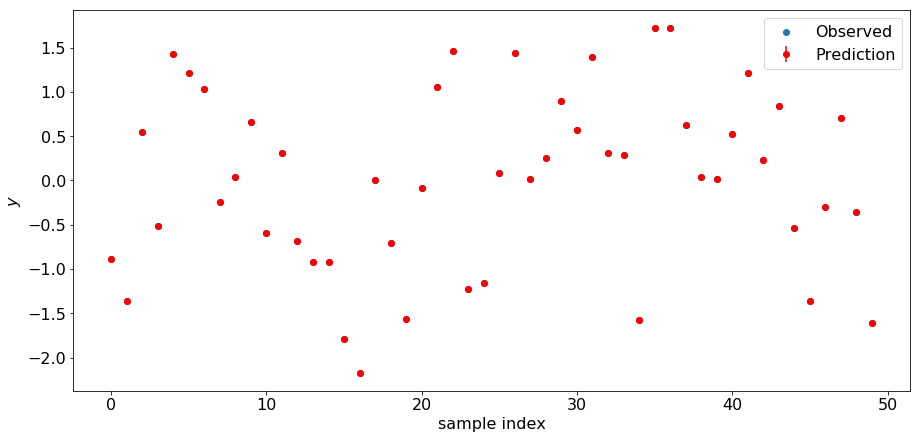

In [10]:
# 訓練データの一致度合いを見る。

plt.figure(figsize=(15, 7))
xs = range(train_pred_mean.shape[0])

plt.scatter(xs, Y, marker="o", label="Observed")

plt.xlabel("sample index")
plt.ylabel("$y$")
# plt.ylim(-3, 3)
plt.errorbar(xs, train_pred_mean, train_pred_std, fmt="ro", label="Prediction", marker="o")
plt.legend(loc="best")
plt.show()